<a href="https://colab.research.google.com/github/Pavancode-py/My-work-of-practice/blob/main/Example%20LRM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [297]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [298]:
df = pd.read_csv("/content/HistoricalData_1742048959626.csv")

df["Open"] = df["Open"].str.replace("$", "").astype(float)
df["Low"] = df["Low"].str.replace("$", "").astype(float)
df["High"] = df["High"].str.replace("$", "").astype(float)
df["Close"] = df["Close"].str.replace("$", "").astype(float)



In [ ]:
# df['Date'] = pd.to_datetime(df['Date'])
# df['Date_delta'] = (df['Date'] - df['Date'].min())  / np.timedelta64(1,'D')
df = df.drop(['Date'],axis=1)
df = df.drop(['Volume'],axis=1)
df.head()

In [ ]:
df.describe()

In [ ]:
sns.pairplot(df)

In [ ]:
plt.figure(figsize=(12,7))
numerical_df=df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='Blues')

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
df.columns

In [306]:
X = df[['Open', 'High', 'Low']]

y = df['Close']

In [308]:
from sklearn.model_selection import train_test_split

In [324]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [310]:
from sklearn.linear_model import LinearRegression

In [311]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   124 non-null    float64
 1   Open    124 non-null    float64
 2   High    124 non-null    float64
 3   Low     124 non-null    float64
dtypes: float64(4)
memory usage: 4.0 KB


In [325]:
reg= LinearRegression()
reg.fit(X,y)

LinearRegression()

In [327]:
reg.score(X_train,y_train)

0.9946495161064675

In [336]:
reg.score(X_test,y_test)

0.9943852643184095

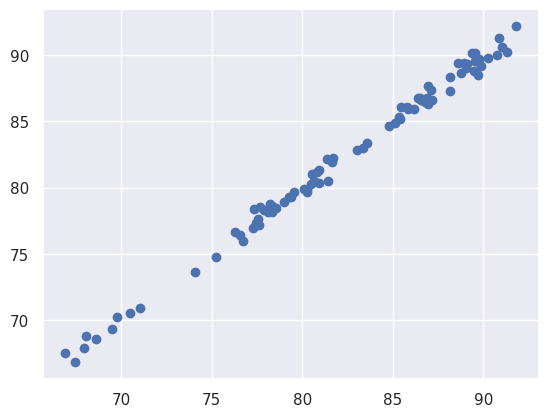

In [335]:
y_pred = reg.predict(X_train)
plt.scatter(y_train,y_pred)



In [331]:
coef_df =  pd.DataFrame(reg.coef_,X.columns, columns=['Coefficient'])

coef_df

,Coefficient
Open,-0.733233
High,0.816658
Low,0.911634


In [318]:
intercept_df =  pd.DataFrame(reg.intercept_,X.columns, columns=['Intercept'])

intercept_df

,Intercept
Open,0.542725
High,0.542725
Low,0.542725


<Axes: >

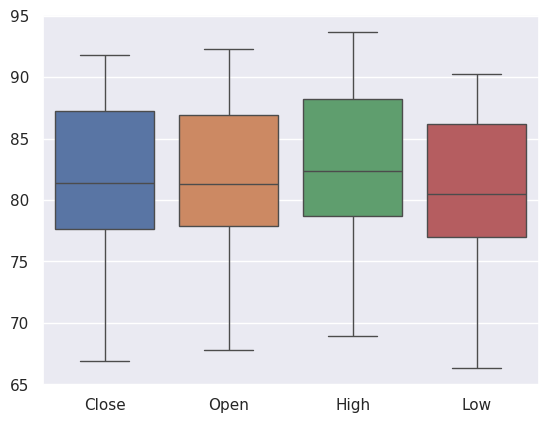

In [319]:
sns.boxplot(df)